# Network Anomaly Detection 
## 02. Data Preprocessing

This phase aim to transform the cleaned data into a model-ready dataset so that ML/DL can learn


### 1. Load the cleaned dataset

In [72]:
import pandas as pd

df = pd.read_csv('../data/processed/cleaned_dataset.csv')

print(f"Loaded dataset shape: {df.shape}")
df.head()

Loaded dataset shape: (3245180, 8)


,time,source,destination,protocol,length,source_port,destination_port,bad_packet
0,0.000000,VMware_8a:60:5f,Broadcast,ARP,60,0,0,0
1,0.081233,VMware_8a:12:84,Broadcast,ARP,60,0,0,0
2,0.217863,VMware_8a:7e:e9,Broadcast,ARP,60,0,0,0
3,0.419426,VMware_8a:b2:34,Broadcast,ARP,60,0,0,0
4,0.559886,VMware_8a:4e:1c,Broadcast,ARP,60,0,0,0


### 2. Feature selection

We want to keep the columns that relevant for ML and drop columns that are identifiers

In [73]:
# Select relevant features
X = df[['protocol', 'length', 'source_port', 'destination_port']]
y = df['bad_packet']

print("Selected features:")
print(X.head())

Selected features:
  protocol  length  source_port  destination_port
0      ARP      60            0                 0
1      ARP      60            0                 0
2      ARP      60            0                 0
3      ARP      60            0                 0
4      ARP      60            0                 0


We remove fields like IP addresses (`source`, `destination`) and `time` because these can make the ML models go overfitting and not really useful.

### 3. Encode categorical features
Convert non-numeric categorical values into numeric form

In [74]:
from sklearn.preprocessing import LabelEncoder

X = X.copy()

encoder = LabelEncoder()
X.loc[:, 'protocol'] = encoder.fit_transform(X['protocol'])

protocol_mapping = pd.DataFrame({
    'Encoded_Value': range(len(encoder.classes_)),
    'Protocol': encoder.classes_
})

X['protocol'] = X['protocol'].astype('int64')

print("\n\nProtocol Encoding Mapping:")
print(protocol_mapping.to_string(index=False))

print(X.head())



Protocol Encoding Mapping:
 Encoded_Value Protocol
             0      ARP
             1  BROWSER
             2     ICMP
             3     NBNS
             4      TCP
             5  TLSv1.2
   protocol  length  source_port  destination_port
0         0      60            0                 0
1         0      60            0                 0
2         0      60            0                 0
3         0      60            0                 0
4         0      60            0                 0


### 4. Feature correlation analysis

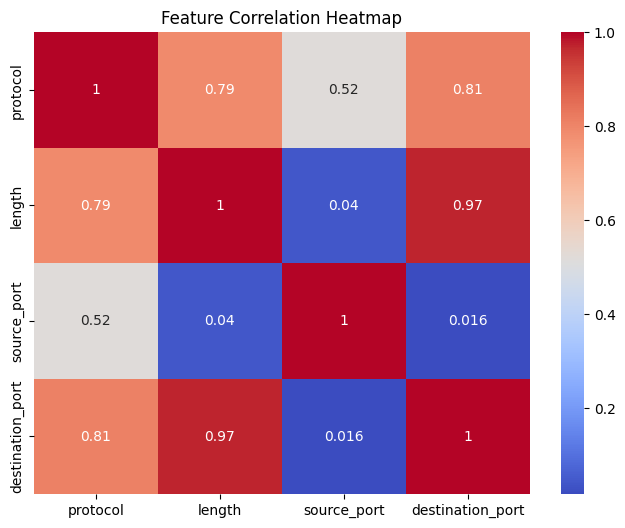

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X_df = pd.DataFrame(X_scaled, columns=X.columns)

plt.figure(figsize=(8,6))
sns.heatmap(X_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


The heatmap shows a very strong correlation between `length` and `destination_port` (0.97).  
This suggests redundancy, so we may drop one of them or apply dimensionality reduction (e.g., PCA) later during model training.  
We will keep them for now.

### 5. Save processed features

In [76]:
import os
import numpy as np
import pandas as pd

os.makedirs('../data/processed', exist_ok=True)

np.save('../data/processed/X.npy', X.values)
np.save('../data/processed/y.npy', y.values)

print("✅ Processed feature files saved successfully.")
print(f"X_scaled shape: {X.shape}")
print(f"y shape: {y.shape}")
print(X.dtypes)
print(X.head())



✅ Processed feature files saved successfully.
X_scaled shape: (3245180, 4)
y shape: (3245180,)
protocol            int64
length              int64
source_port         int64
destination_port    int64
dtype: object
   protocol  length  source_port  destination_port
0         0      60            0                 0
1         0      60            0                 0
2         0      60            0                 0
3         0      60            0                 0
4         0      60            0                 0
